Se han generado 500 datos de consumo de refrescos.

Primeros 10 datos generados:
    Refresco
       Pepsi
     Mirinda
        7 Up
       Fanta
   Coca-Cola
   Coca-Cola
   Coca-Cola
Mountain Dew
       Fanta
        7 Up
Tabla de Frecuencias de Consumo de Refrescos:
              Frecuencia Absoluta  Frecuencia Relativa (%)  Frecuencia Acumulada Absoluta  Frecuencia Acumulada Relativa (%)
Refresco                                                                                                                    
Coca-Cola                     130                     26.0                            130                               26.0
Pepsi                          93                     18.6                            223                               44.6
Sprite                         56                     11.2                            279                               55.8
Fanta                          55                     11.0                            334                

C:\Users\abi25\AppData\Local\Temp\ipykernel_3412\3496227427.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_frecuencias.index, y=df_frecuencias['Frecuencia Absoluta'], palette=colores_barras)


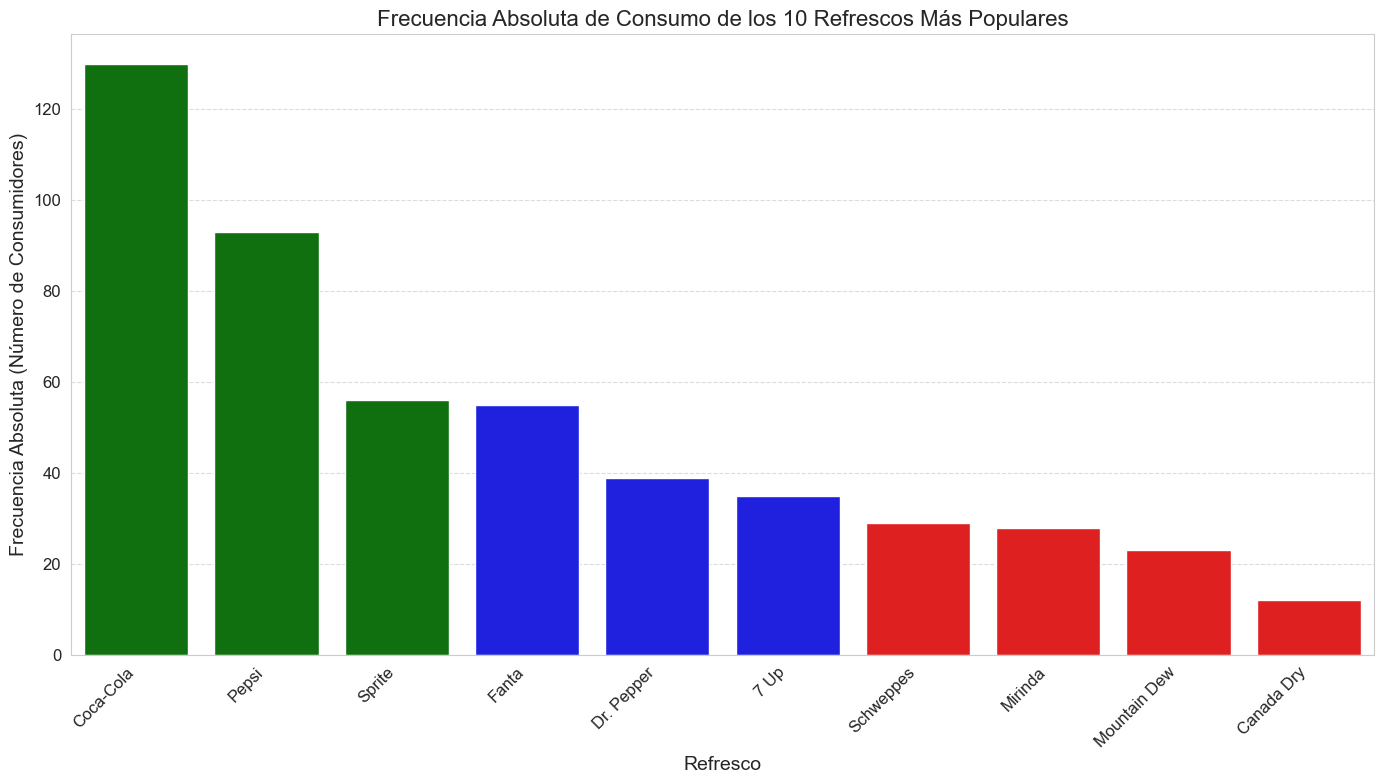

C:\Users\abi25\AppData\Local\Temp\ipykernel_3412\3496227427.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_frecuencias['Frecuencia Absoluta'], y=df_frecuencias.index, palette=colores_barras)


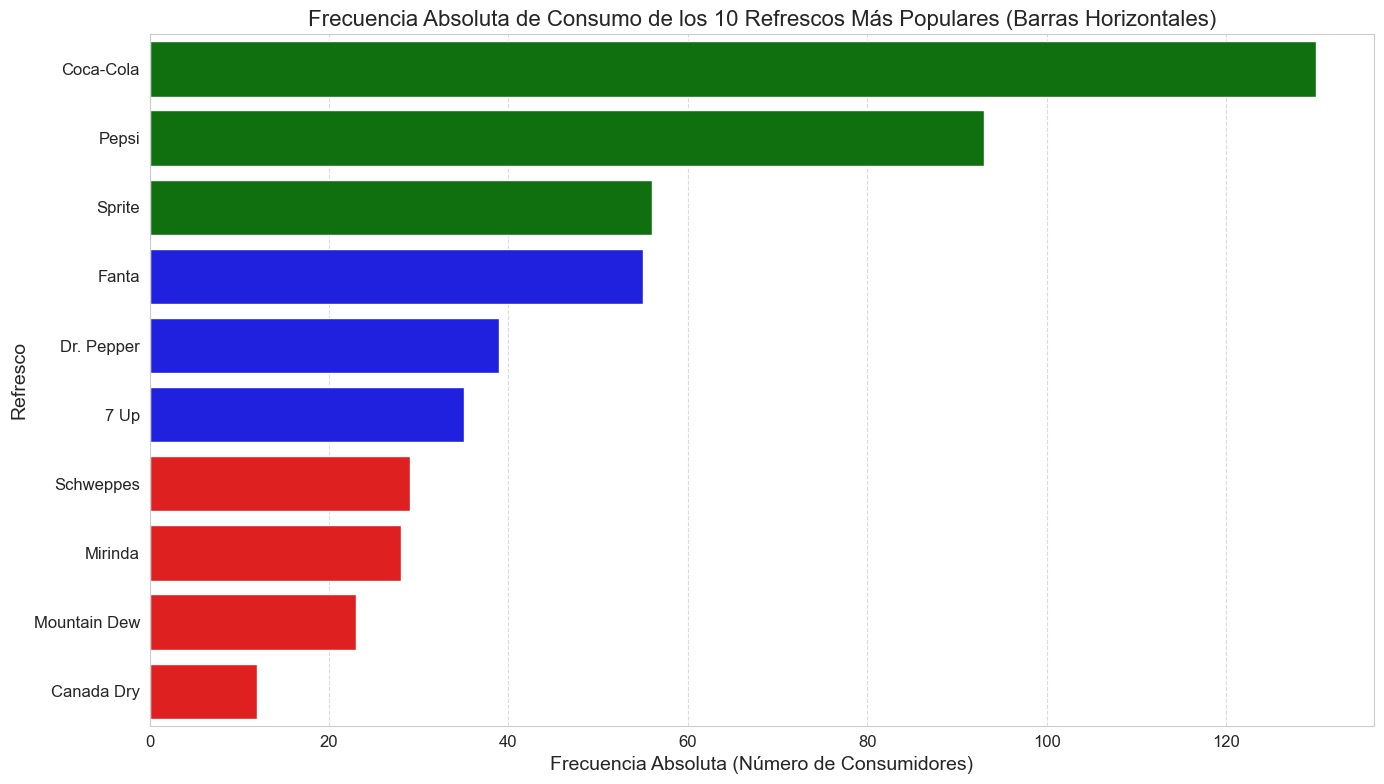

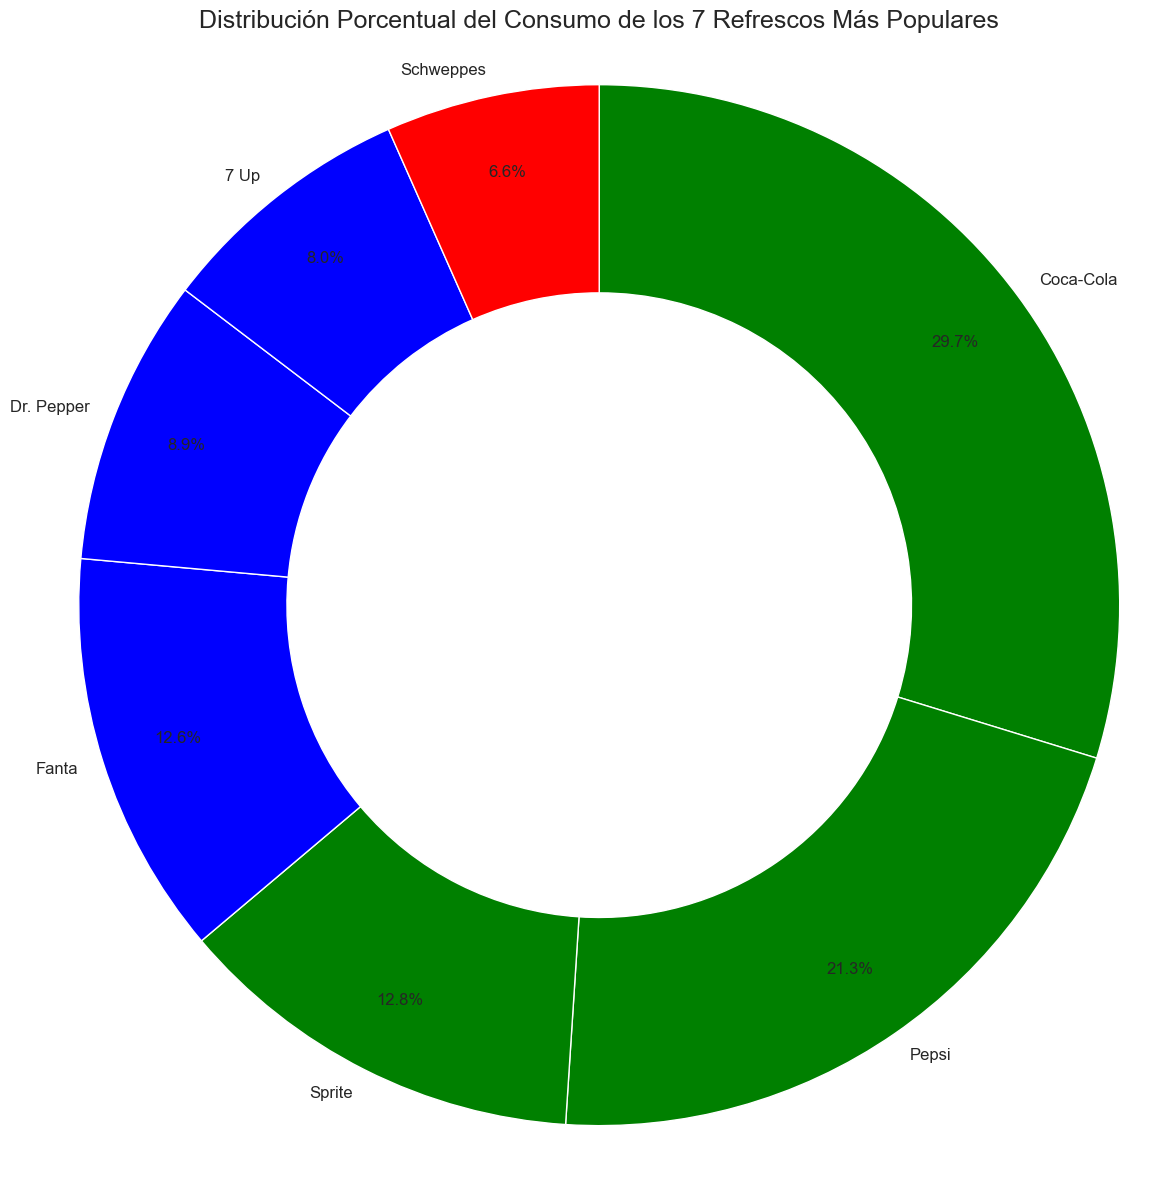

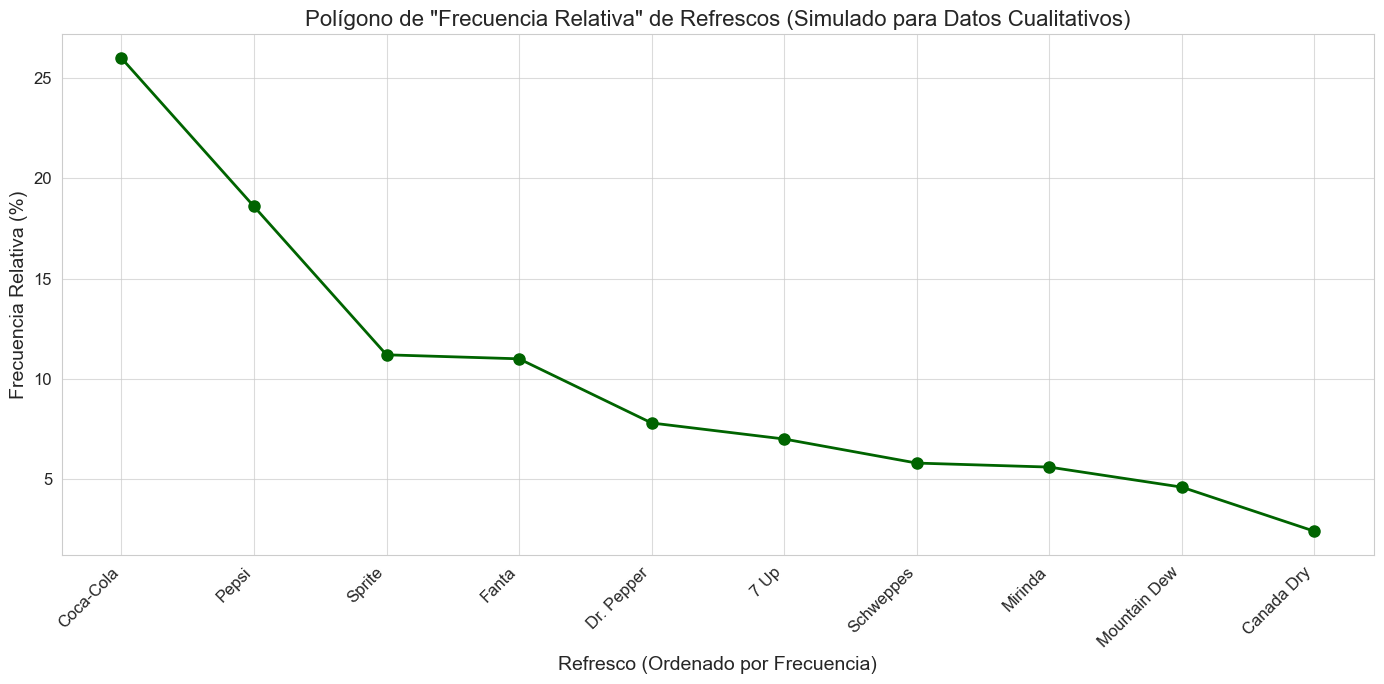

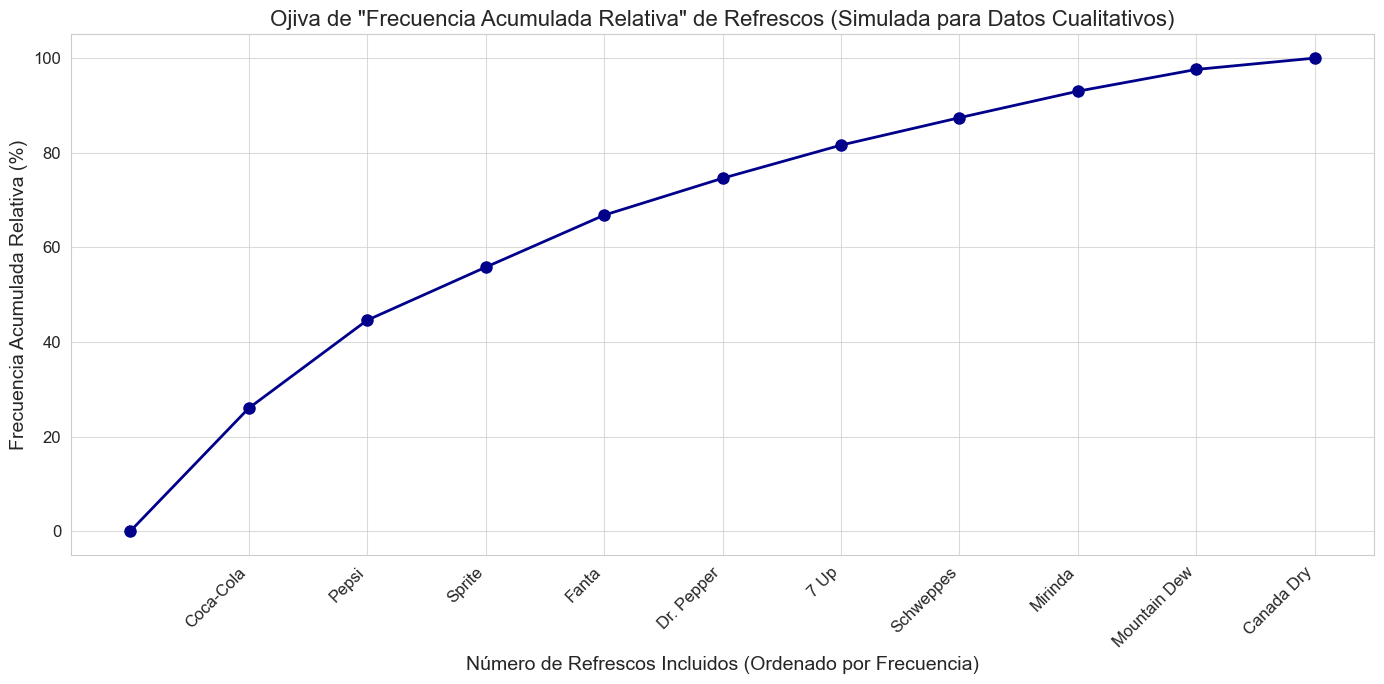

In [12]:
# %% [markdown]
# # Análisis y Visualización del Consumo de los 10 Refrescos Más Populares
#
# **ADVERTENCIA IMPORTANTE:** Las gráficas de "Polígono de Frecuencia" y "Ojiva"
# son estadísticamente apropiadas para **datos cuantitativos (numéricos)**. Su uso con
# datos cualitativos (categorías) no es estándar y su interpretación debe ser cautelosa.

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'figure.autolayout': True,
    'grid.alpha': 0.7,
    'grid.linestyle': '--'
})
sns.set_style("whitegrid")

refrescos_populares = [
    'Coca-Cola', 'Pepsi', 'Sprite', 'Fanta', '7 Up',
    'Dr. Pepper', 'Mountain Dew', 'Schweppes', 'Mirinda', 'Canada Dry'
]
num_datos = 500
probabilidades = [0.25, 0.20, 0.12, 0.10, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03]

np.random.seed(42)
datos_refrescos = np.random.choice(
    refrescos_populares,
    size=num_datos,
    p=probabilidades
)

df_refrescos = pd.DataFrame({'Refresco': datos_refrescos})

print(f"Se han generado {num_datos} datos de consumo de refrescos.")
print("\nPrimeros 10 datos generados:")
print(df_refrescos.head(10).to_string(index=False))

# %% [markdown]
# ## 2. Cálculo de Frecuencias

# %%
frecuencia_absoluta = df_refrescos['Refresco'].value_counts().sort_values(ascending=False)
frecuencia_relativa = (df_refrescos['Refresco'].value_counts(normalize=True) * 100).reindex(frecuencia_absoluta.index)

frecuencia_absoluta_acumulada = np.cumsum(frecuencia_absoluta.values)
frecuencia_relativa_acumulada = np.cumsum(frecuencia_relativa.values)

df_frecuencias = pd.DataFrame({
    'Frecuencia Absoluta': frecuencia_absoluta,
    'Frecuencia Relativa (%)': np.round(frecuencia_relativa, 2),
    'Frecuencia Acumulada Absoluta': frecuencia_absoluta_acumulada,
    'Frecuencia Acumulada Relativa (%)': np.round(frecuencia_relativa_acumulada, 2)
}).fillna(0)

print("Tabla de Frecuencias de Consumo de Refrescos:")
print(df_frecuencias.to_string())

# %% [markdown]
# ## 3. Gráficas de Frecuencia Absoluta con Esquema de Colores

# %%
colores_barras = []
for i in range(len(df_frecuencias)):
    if i < 3:
        colores_barras.append('green')
    elif i < 6:
        colores_barras.append('blue')
    else:
        colores_barras.append('red')

# %% [markdown]
# ### Diagrama de Barras Vertical (Frecuencia Absoluta)

# %%
plt.figure(figsize=(14, 8))
sns.barplot(x=df_frecuencias.index, y=df_frecuencias['Frecuencia Absoluta'], palette=colores_barras)
plt.title('Frecuencia Absoluta de Consumo de los 10 Refrescos Más Populares')
plt.xlabel('Refresco')
plt.ylabel('Frecuencia Absoluta (Número de Consumidores)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# %% [markdown]
# ### Diagrama de Barras Horizontales (Frecuencia Absoluta)

# %%
plt.figure(figsize=(14, 8))
sns.barplot(x=df_frecuencias['Frecuencia Absoluta'], y=df_frecuencias.index, palette=colores_barras)
plt.title('Frecuencia Absoluta de Consumo de los 10 Refrescos Más Populares (Barras Horizontales)')
plt.xlabel('Frecuencia Absoluta (Número de Consumidores)')
plt.ylabel('Refresco')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# %% [markdown]
# ## 4. Gráfica de Frecuencia Relativa (Diagrama de Pastel)

# %%
df_top7 = df_frecuencias.head(7)

colores_pastel = []
for i in range(len(df_top7)):
    if i < 3:
        colores_pastel.append('green')
    elif i < 6:
        colores_pastel.append('blue')
    else:
        colores_pastel.append('red')

plt.figure(figsize=(12, 12))
plt.pie(df_top7['Frecuencia Absoluta'], labels=df_top7.index,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False,
        colors=colores_pastel,
        pctdistance=0.85, labeldistance=1.05,
        wedgeprops=dict(width=0.4, edgecolor='w'))

plt.title('Distribución Porcentual del Consumo de los 7 Refrescos Más Populares', fontsize=18)
plt.axis('equal')
plt.show()

# %% [markdown]
# ## 5. "Simulación" de Polígono de Frecuencia y Ojiva para Datos Cualitativos
#
# **ADVERTENCIA:** Estas gráficas no son estadísticamente estándar para datos cualitativos.

# %% [markdown]
# ### Polígono de "Frecuencia Relativa" (Simulado)

# %%
plt.figure(figsize=(14, 7))
plt.plot(df_frecuencias.index, df_frecuencias['Frecuencia Relativa (%)'],
         marker='o', linestyle='-', color='darkgreen', linewidth=2, markersize=8)
plt.title('Polígono de "Frecuencia Relativa" de Refrescos (Simulado para Datos Cualitativos)')
plt.xlabel('Refresco (Ordenado por Frecuencia)')
plt.ylabel('Frecuencia Relativa (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# %% [markdown]
# ### Ojiva de Frecuencia Acumulada (Simulada)

# %%
plt.figure(figsize=(14, 7))
x_indices = np.arange(1, len(df_frecuencias) + 1)
x_ojiva_sim = np.insert(x_indices, 0, 0)
y_ojiva_sim_perc = np.insert(df_frecuencias['Frecuencia Acumulada Relativa (%)'].values, 0, 0)

plt.plot(x_ojiva_sim, y_ojiva_sim_perc, marker='o', linestyle='-', color='darkblue', linewidth=2, markersize=8)
plt.title('Ojiva de "Frecuencia Acumulada Relativa" de Refrescos (Simulada para Datos Cualitativos)')
plt.xlabel('Número de Refrescos Incluidos (Ordenado por Frecuencia)')
plt.ylabel('Frecuencia Acumulada Relativa (%)')
plt.xticks(ticks=x_indices, labels=df_frecuencias.index, rotation=45, ha='right')
plt.grid(True)
plt.show()